# Bank-data

## 1. Exploring Data

In [1]:
import pandas as pd

encoding = 'iso-8859-1'    
delimiter = ';'
filename = 'bank-data.csv'

bank = pd.read_csv(filename, 
                   delimiter = delimiter,
                   encoding = encoding)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,-1.0,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,-1.0,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1.0,-1.0,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,-1.0,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,-1.0,0,unknown,no


### Checking size

In [2]:
bank.shape

(45211, 17)

### Statistics

In [3]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45210.000000,45207.000000,45211.000000,45209.000000,45210.000000,45208.000000,45211.000000
mean,40.935965,1362.349946,15.806419,258.166626,2.763858,40.192134,0.580323
std,10.618752,3044.886973,8.322476,257.532767,3.098053,100.121122,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Checking more characteristics

In [4]:
size = len(bank)
keys = bank.keys()

nulls = []
values = []
Nvalues = []
for key in keys:
    nulls.append(len(bank[bank[key].isna() == True][key]))
    try:
        values.append(bank[key].unique())
        Nvalues.append(len(bank[key].unique()))
    except:
        values.append('NA')
        Nvalues.append('NA')

data = {'keys': keys, 
        'Nulls': nulls, 
        'Values': values,
        '# Values': Nvalues}

Details = pd.DataFrame(data=data)
Details

,keys,Nulls,Values,# Values
0,age,1,"[58.0, 44.0, 33.0, 47.0, 35.0, 28.0, 42.0, 43....",78
1,job,5,"[management, technician, entrepreneur, blue-co...",14
2,marital,6,"[married, single, divorced, nan]",4
3,education,7,"[tertiary, secondary, unknown, nan, primary]",5
4,default,4,"[no, nan, yes]",3
5,balance,4,"[2143.0, 29.0, 2.0, 1506.0, 1.0, 231.0, nan, 1...",7169
6,housing,4,"[yes, no, nan]",3
7,loan,2,"[no, yes, nan]",3
8,contact,8,"[unknown, nan, cellular, telephone]",4
9,day,0,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...",31


### Checking by plots

In [5]:
import seaborn as sb

sb.pairplot(bank) # Using categorical field

C:\Users\Alexander\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alexander\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C5FA070F0>,
      dtype=object)

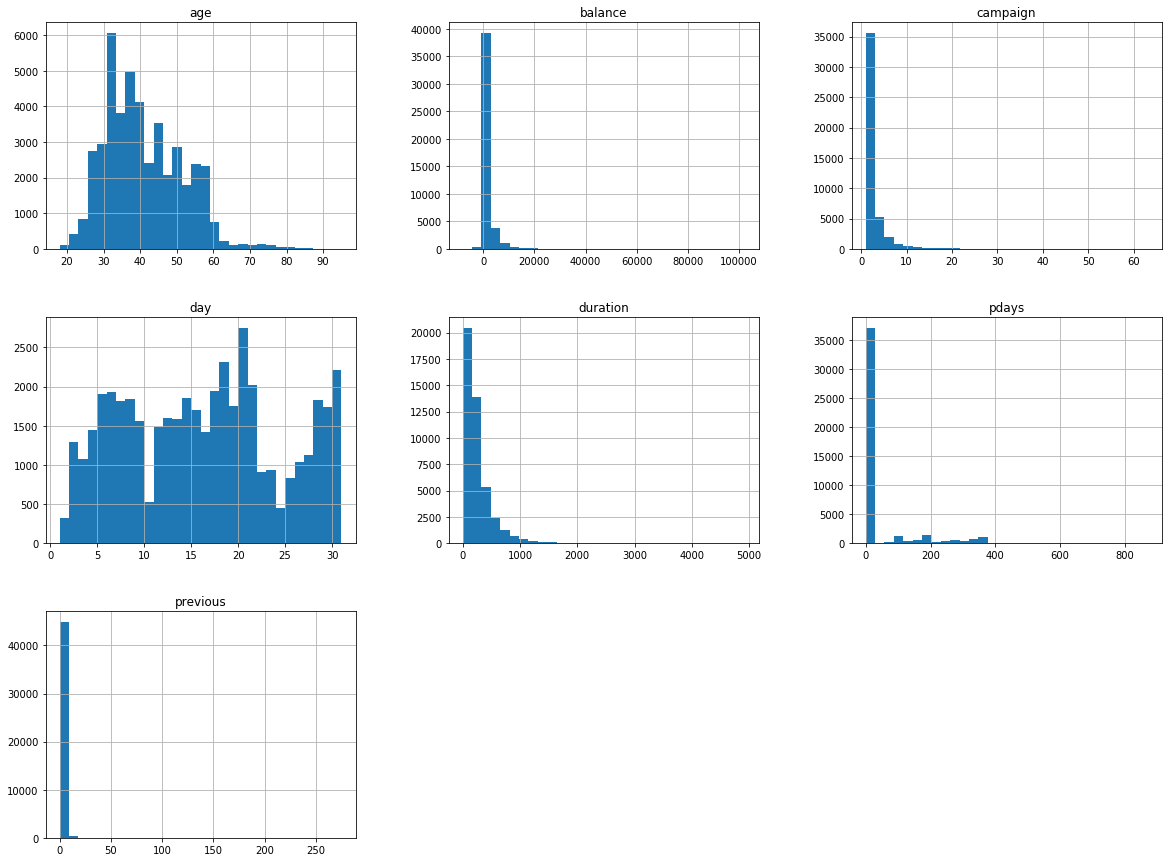

In [6]:
bank.hist(bins=30, figsize=(20,15))